#### **Date:** 25/11/2025

# ⌖ Technical Indicators
In this notebook we are calculating 12 different technical indicators. There are classified in 4 types of indicators: tendency indicators, momentum indicators, volatility indicators and volume indicators. There exist a lot more indicators, but firstly we are calculating those basic ones.  
 
We will first calculate the indicators for the 1h timeframe dataset.

## Importing the dataset

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('../data/btcusdt_1h_2018_preprocessed.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2018-01-01 00:00:00,13715.65,13715.65,13400.01,13529.01,443.356199
2018-01-01 01:00:00,13528.99,13595.89,13155.38,13203.06,383.697006
2018-01-01 02:00:00,13203.00,13418.43,13200.00,13330.18,429.064572
2018-01-01 03:00:00,13330.26,13611.27,13290.00,13410.03,420.087030
2018-01-01 04:00:00,13434.98,13623.29,13322.15,13601.01,340.807329


## 1. Tendency indicators
Tendency indicators help us identifying the direction of the price.

### 1.1 Moving Average (EMA and SMA)
Moving Averages help to understand better the general direction of the price. There are a lot of types of moving averages, yet, the most basic one is the simple moving average (SMA). To calculate the value of this indicator we perform the mean of the close price of the last n periods. We call that SMA the n period SMA. 
Another useful moving average is the exponential moving average, which is calculated in a similar way but giving more weight to the closer close prices.

We are calculating the simple moving average of 200 periods and the exponential moving average of 50 periods.

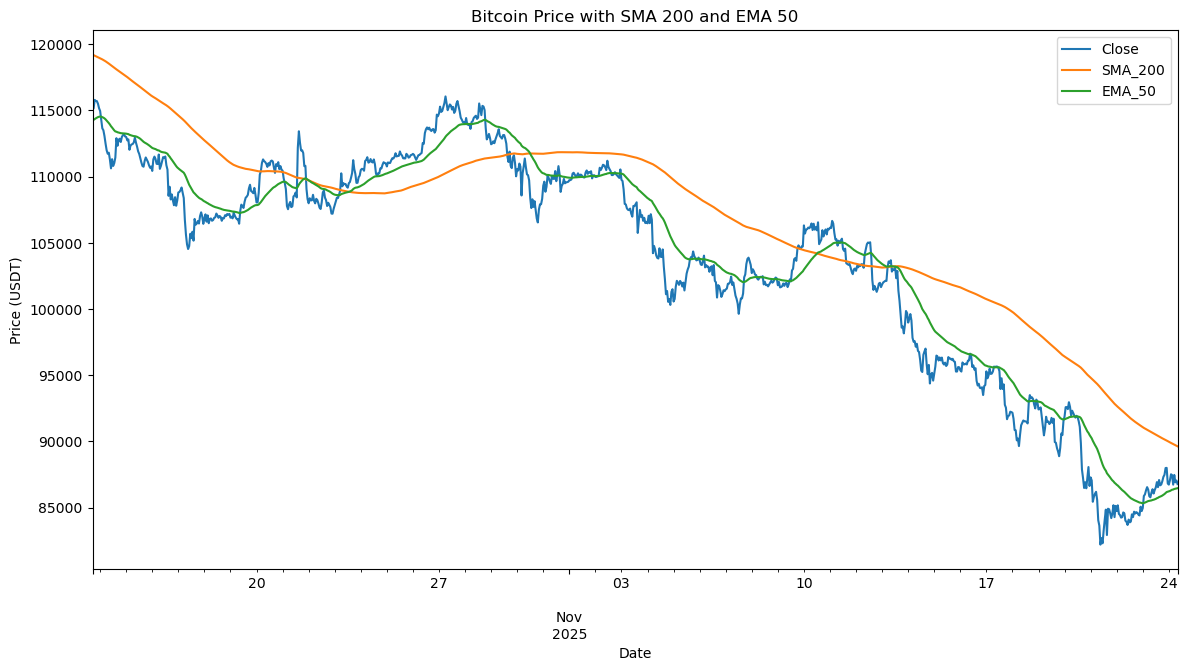

In [13]:
# 200 periods SMA
df['SMA_200'] = df['Close'].rolling(window=200).mean()  
# 50 periods EMA
df['EMA_50'] = df['Close'].ewm(span=50, adjust=False).mean()
df_sample = df.tail(1000)

df_sample[['Close', 'SMA_200', 'EMA_50']].plot(figsize=(14,7))
plt.title('Bitcoin Price with SMA 200 and EMA 50')
plt.xlabel('Date')
plt.ylabel('Price (USDT)')
plt.legend()
plt.show()  

### 1.2 MACD
It shows the relation between 2 EMAs (usually the 12 and 26 period EMA). It is used not only to identifying the general direction, but also to predict the duration of the trend with an aditional signal line. If the MACD line crosses above the signal line, it indicates an bullish trend. 

We are calculating MACD with the usual parameters (EMA 12 and EMA 26, and the EMA 9 signal line).

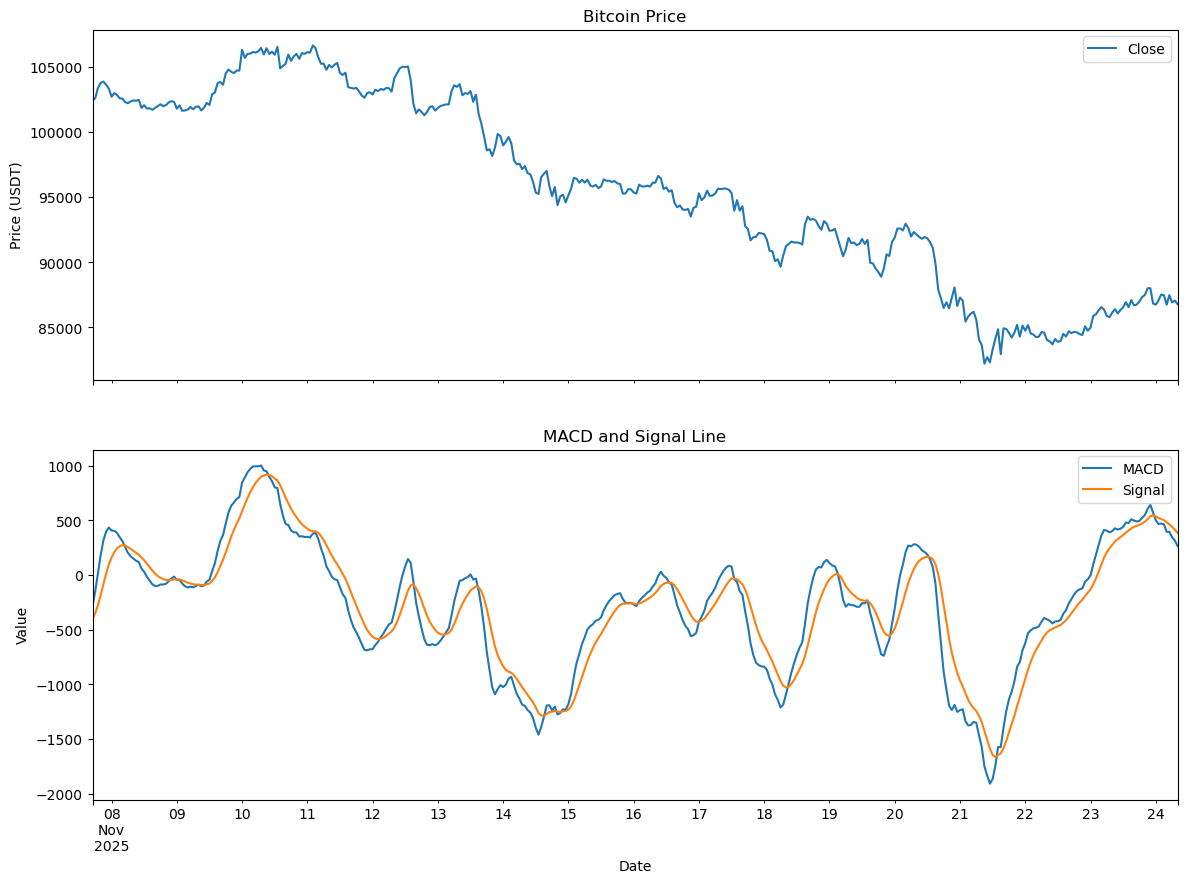

In [17]:
# MACD Calculation
ema_12 = df['Close'].ewm(span=12, adjust=False).mean()
ema_26 = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = ema_12 - ema_26
df['Signal'] = df['MACD'].ewm(span=9, adjust=False).mean() 
df_sample = df.tail(400)

# Plotting MACD
fig, ax = plt.subplots(2, 1, figsize=(14,10), sharex=True)
df_sample[['Close']].plot(ax=ax[0])
ax[0].set_title('Bitcoin Price')
ax[0].set_ylabel('Price (USDT)')
df_sample[['MACD', 'Signal']].plot(ax=ax[1])
ax[1].set_title('MACD and Signal Line')
ax[1].set_ylabel('Value')
plt.xlabel('Date')
plt.show()  

### 1.3 Average Directional Index
Average directional index (ADX) indicates power of the trend, no matter the direction. If the ADX line is above 25, it indicates a powerful trend.

As calculating ADX is not a trivial step, we are using `ta-lib` library to help us.

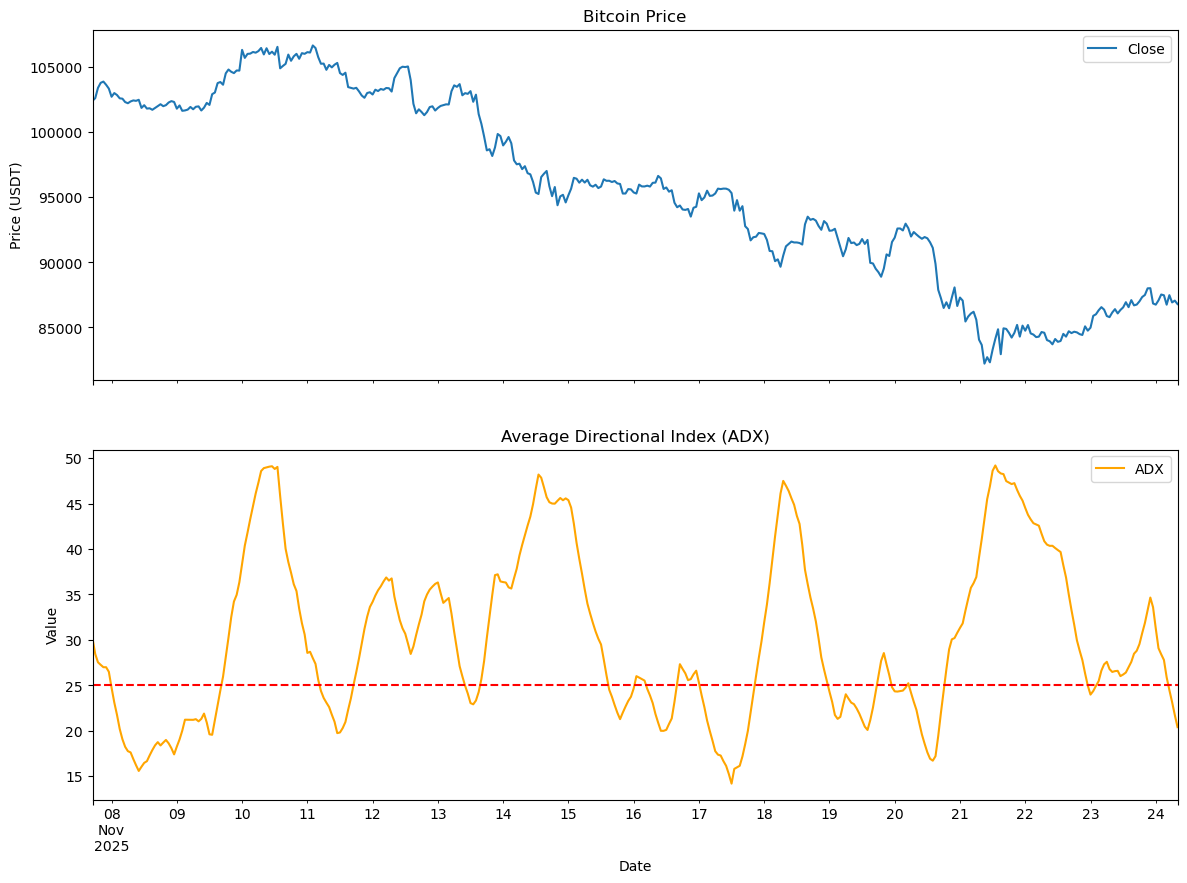

In [22]:
!pip install ta-Lib
import talib as ta
# ADX Calculation
df['ADX'] = ta.ADX(df['High'], df['Low'], df['Close'], timeperiod=14)
df_sample = df.tail(400)    
# Plotting ADX
fig, ax = plt.subplots(2,1, figsize=(14,10), sharex=True)
df_sample[['Close']].plot(ax=ax[0])
ax[0].set_title('Bitcoin Price')
ax[0].set_ylabel('Price (USDT)')
df_sample[['ADX']].plot(ax=ax[1], color='orange')
ax[1].axhline(25, color='red', linestyle='--', label='Threshold (25)')
ax[1].set_title('Average Directional Index (ADX)')
ax[1].set_ylabel('Value')
plt.xlabel('Date')
plt.show() 

## 2. Momentum indicators
Momentum indicators are used to identify trend's power. They also indicate if an asset is overpurchased or oversold.

### 2.1 Relative Strenght Index
Relative Strenght index (RSI), measures how overpurchased or oversold is an asset. It is calculated relating price gains and losses.
Usually, it is said that an asset is oversold when the RSI value is under 30, and overpurchased when it is above 70.

We are calculating RSI with the usual parameters (14 period RSI).

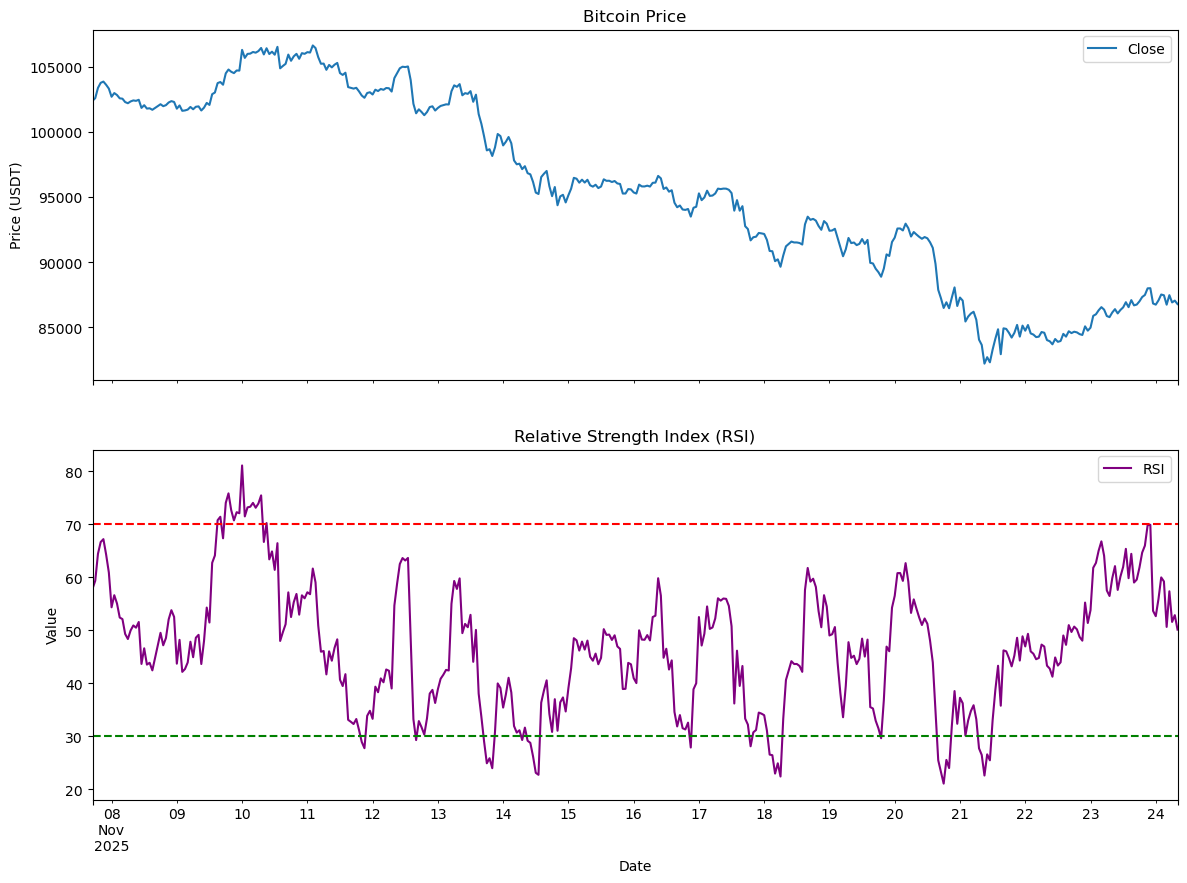

In [23]:
# RSI Calculation
df['RSI'] = ta.RSI(df['Close'], timeperiod=14)
df_sample = df.tail(400)    
# Plotting RSI
fig, ax = plt.subplots(2,1, figsize=(14,10), sharex=True)
df_sample[['Close']].plot(ax=ax[0])
ax[0].set_title('Bitcoin Price')
ax[0].set_ylabel('Price (USDT)')
df_sample[['RSI']].plot(ax=ax[1], color='purple')
ax[1].axhline(70, color='red', linestyle='--', label='Overbought (70)')
ax[1].axhline(30, color='green', linestyle='--', label='Oversold (30)')
ax[1].set_title('Relative Strength Index (RSI)')
ax[1].set_ylabel('Value')
plt.xlabel('Date')
plt.show()

### 2.2 Stocastic
This indicator is also used to identify in which moment of the tendency we are. In oversold levels, if line %K crosses above the %D line, it indicates a purchase signal.

It is calculated comparing the current close price with the previous prices (usually are used the previous 14 periods). If the 

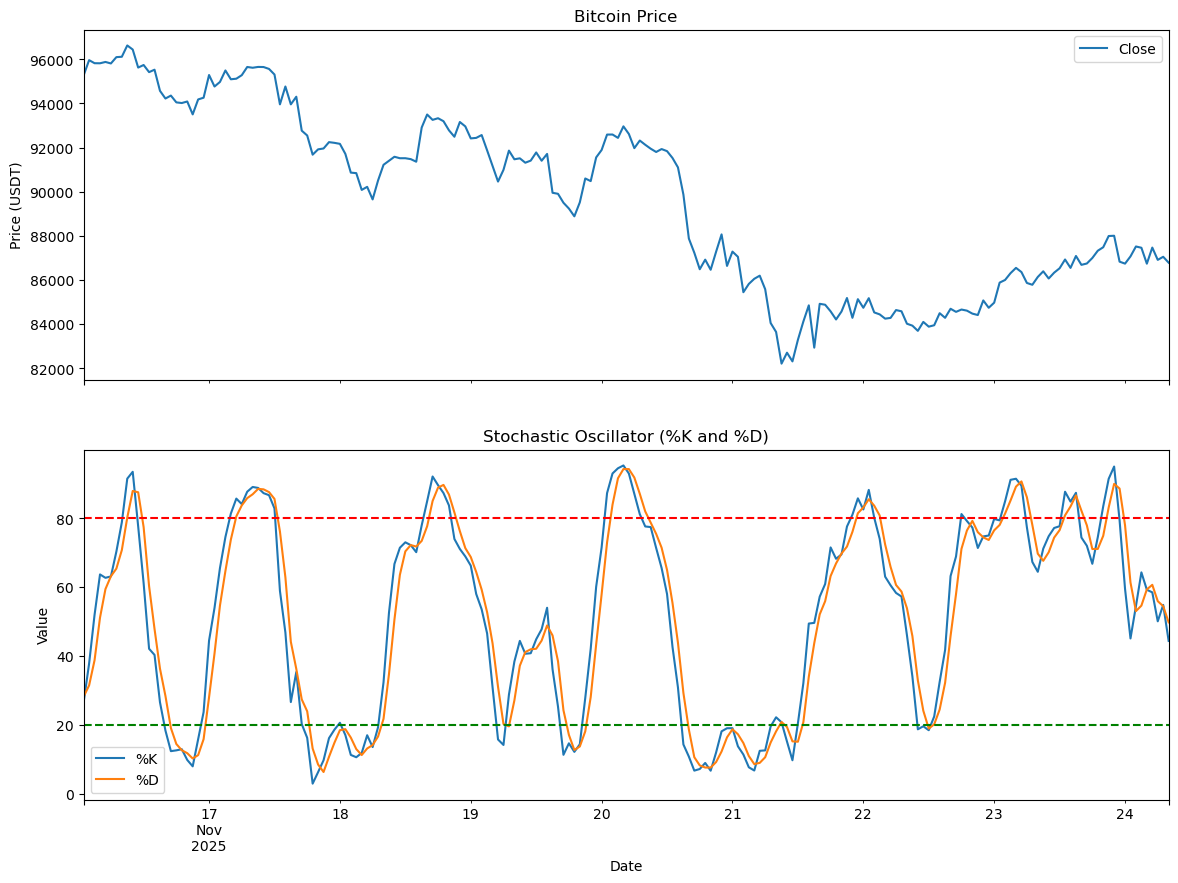

In [25]:
# Stocastic Calculation
df['%K'], df['%D'] = ta.STOCH(df['High'], df['Low'], df['Close'], 
                              fastk_period=14, 
                              slowk_period=3, 
                              slowd_period=3)
df_sample = df.tail(200)    
# Plotting Stocastic
fig, ax = plt.subplots(2,1, figsize=(14,10), sharex =True)
df_sample[['Close']].plot(ax=ax[0])
ax[0].set_title('Bitcoin Price')
ax[0].set_ylabel('Price (USDT)')
df_sample[['%K', '%D']].plot(ax=ax[1])
ax[1].axhline(80, color='red', linestyle='--', label='Overbought (80)')
ax[1].axhline(20, color='green', linestyle='--', label='Oversold (20)')
ax[1].set_title('Stochastic Oscillator (%K and %D)')
ax[1].set_ylabel('Value')
plt.xlabel('Date')
plt.show()  

## 2.3 Elder-Ray Index
It measures the momentum of the trend using the change of the price and the volume. A possitive value indicates that the bullers are pushing the price up.

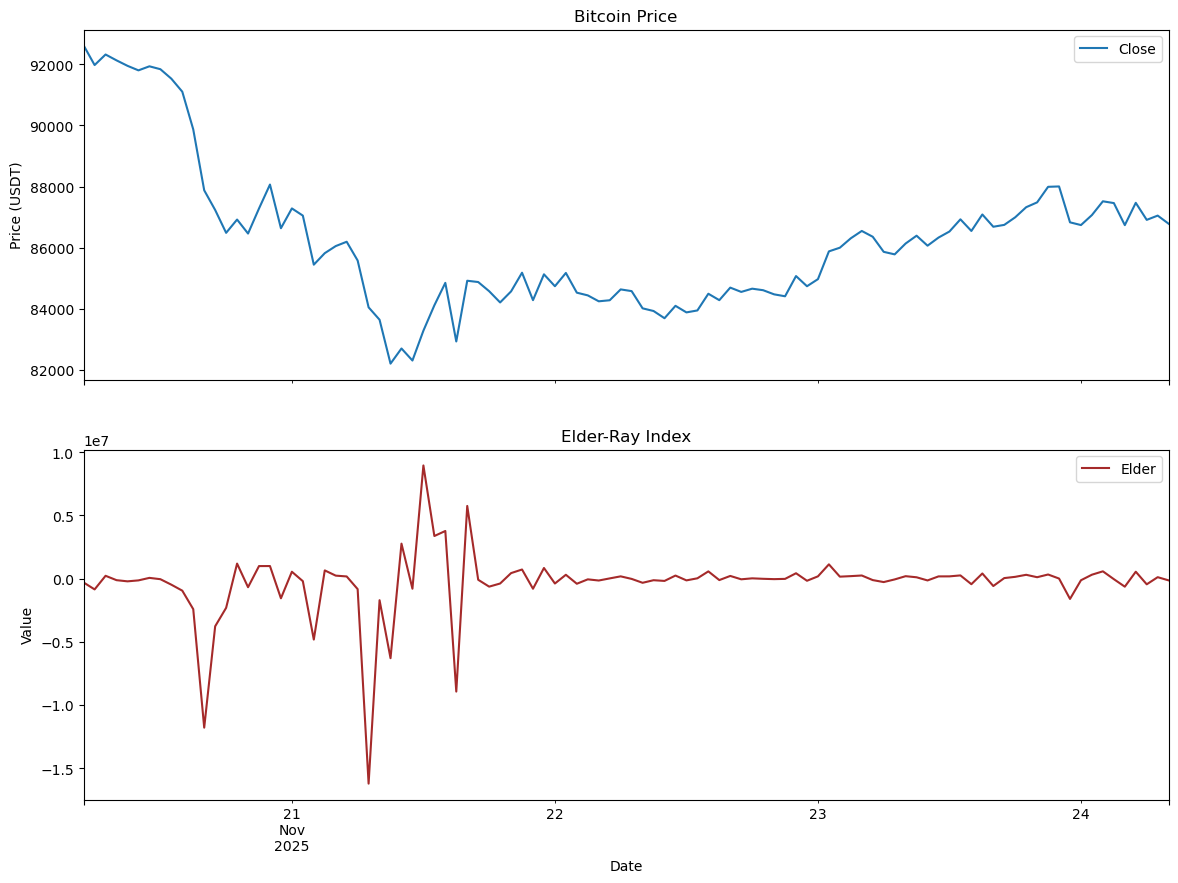

In [29]:
# Elder-Ray Index Calculation
df['Elder'] = (df['Close'] - df['Close'].shift(1))*df['Volume']
df_sample = df.tail(100)    
# Plotting Elder-Ray Index
fig, ax = plt.subplots(2,1, figsize=(14,10), sharex=True)
df_sample[['Close']].plot(ax=ax[0])
ax[0].set_title('Bitcoin Price')
ax[0].set_ylabel('Price (USDT)')
df_sample[['Elder']].plot(ax=ax[1], color='brown')
ax[1].set_title('Elder-Ray Index')
ax[1].set_ylabel('Value')
plt.xlabel('Date')
plt.show()   

## 3. Volativity Indicators
Volativity indicators are used to identify the magnitude and the frecuency of the market's movements. They indicate how much can the price vary in a given period of time.

### 3.1 Bollinger Bands
Bollinger bands measure the volativity of an asset. It is used to measure when an asset is overpurchased or oversold. If the price crosses above the upper bollinger band, it indicates that the asset is overpurchased.

They are calculated using a SMA and the standard desviation.

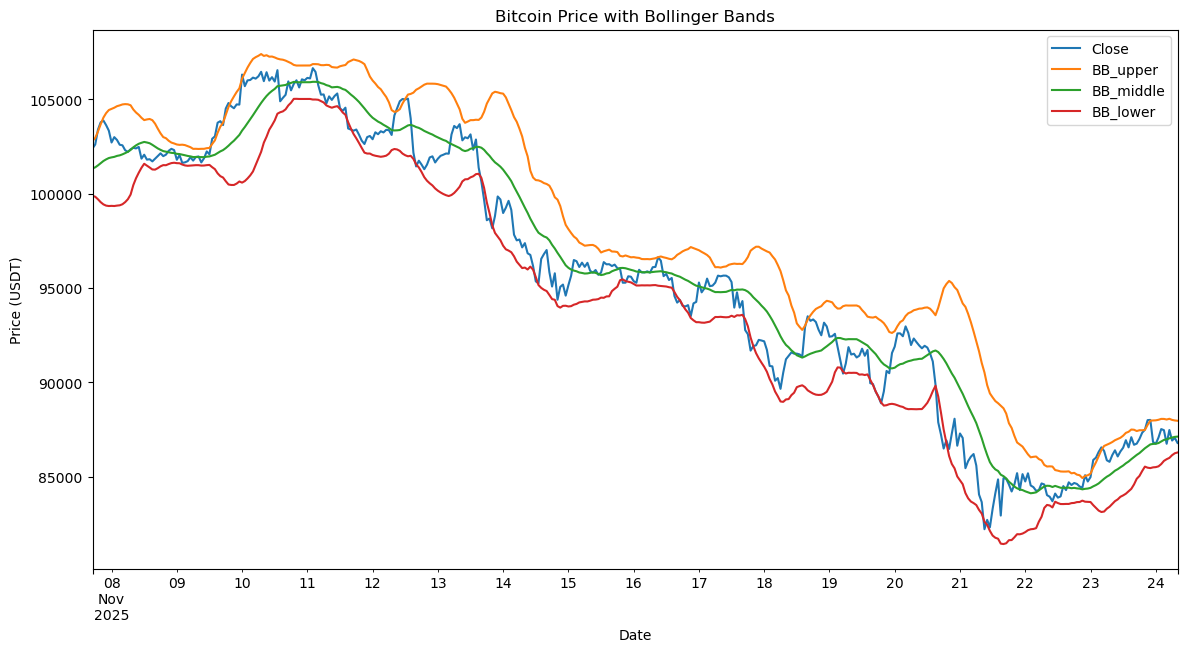

In [30]:
# Bollinger Bands Calculation
df['BB_middle'] = df['Close'].rolling(window=20).mean()
df['BB_std'] = df['Close'].rolling(window=20).std()
df['BB_upper'] = df['BB_middle'] + (df['BB_std'] * 2)
df['BB_lower'] = df['BB_middle'] - (df['BB_std'] * 2)
df_sample = df.tail(400)    
# Plotting Bollinger Bands
fig, ax = plt.subplots(figsize=(14,7))
df_sample[['Close', 'BB_upper', 'BB_middle', 'BB_lower']].plot(ax=ax)
plt.title('Bitcoin Price with Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price (USDT)')
plt.legend()
plt.show()  

## 3.2 Average True Range
The average true range (atr) is used to measure the variatons of the price in a given period of time. It is specially useful to manage the risk. A high ATR value indicates a high volativity, and, for instance, the stoploss should be amplified.
 It is calculated using the moving average of the price variations, usually with a period of 14.

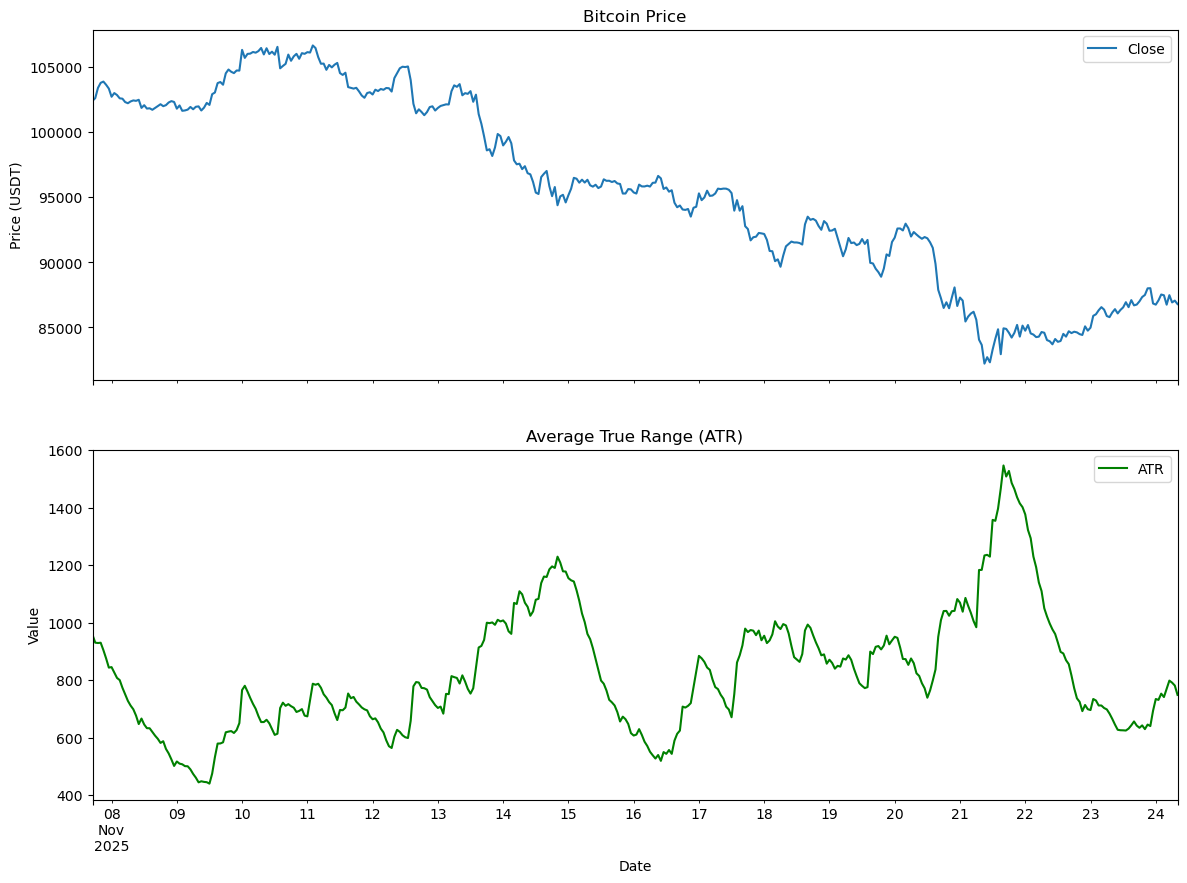

In [31]:
# Average True Range Calculation
df['ATR'] = ta.ATR(df['High'], df['Low'], df['Close'], timeperiod=14)
df_sample = df.tail(400)    
# Plotting ATR
fig, ax = plt.subplots(2,1, figsize=(14,10), sharex=True)
df_sample[['Close']].plot(ax=ax[0])
ax[0].set_title('Bitcoin Price')
ax[0].set_ylabel('Price (USDT)')
df_sample[['ATR']].plot(ax=ax[1], color='green')
ax[1].set_title('Average True Range (ATR)')
ax[1].set_ylabel('Value')
plt.xlabel('Date')
plt.show()  

### 3.3 Commodity Channel Index
Commodity channel index (CCI) measures the desviation of the price with respect to a moving average (usually SMA 20). A CCI higher than 100 indicates a overpurchased asset.

It is used to identify overpurchased and oversold periods.

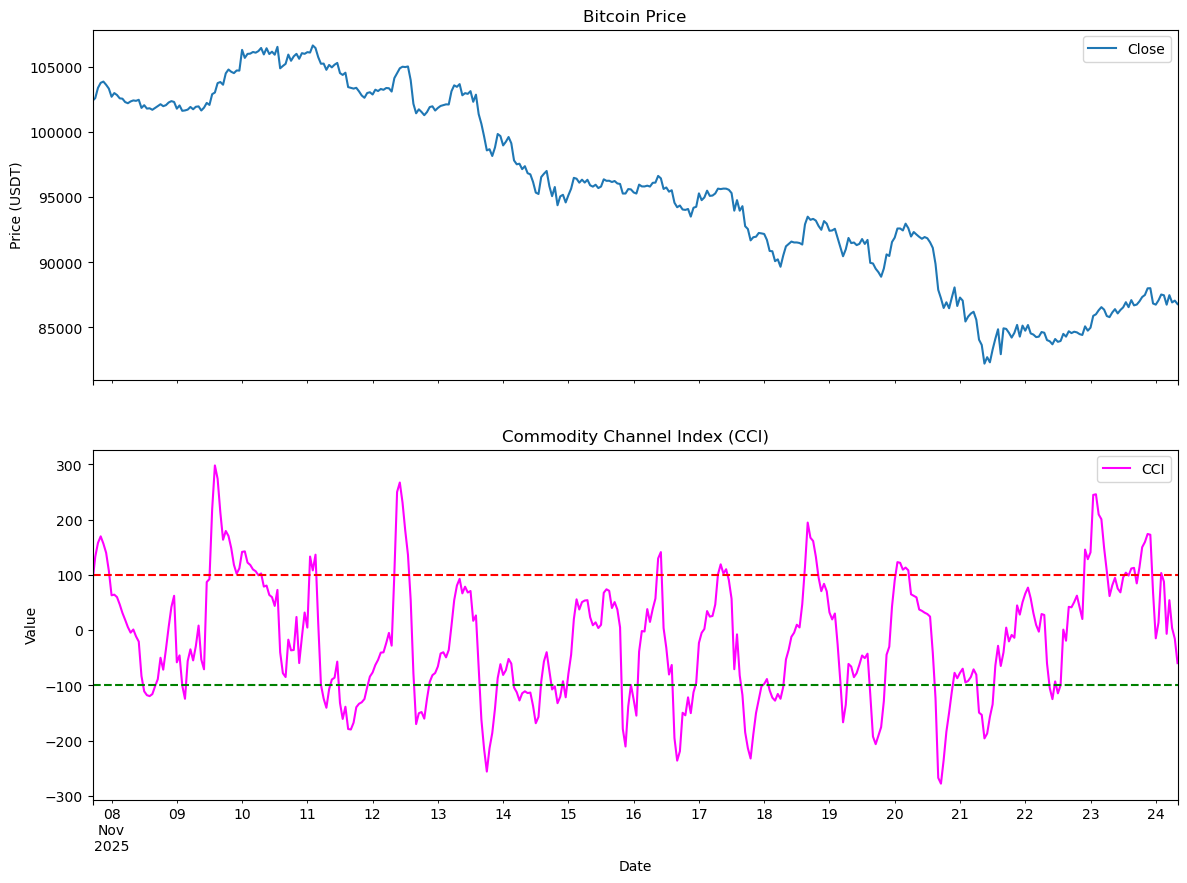

In [32]:
# Commodity Channel Index Calculation
df['CCI'] = ta.CCI(df['High'], df['Low'], df['Close'], timeperiod=20)
df_sample = df.tail(400)    
# Plotting CCI
fig, ax = plt.subplots(2,1, figsize=(14,10), sharex =True)
df_sample[['Close']].plot(ax=ax[0])
ax[0].set_title('Bitcoin Price')
ax[0].set_ylabel('Price (USDT)')
df_sample[['CCI']].plot(ax=ax[1], color='magenta')
ax[1].axhline(100, color='red', linestyle='--', label='Overbought (100)')
ax[1].axhline(-100, color='green', linestyle='--', label='Oversold (-100)')
ax[1].set_title('Commodity Channel Index (CCI)')
ax[1].set_ylabel('Value')
plt.xlabel('Date')
plt.show()  

## 4. Volume Indicators
Volume indicators are commonly used to confirm trends. A high volume indicates that a trend is supported by a significant activity.

### 4.1 On Balance Volume
On Balance Volume (OBV) indicator is used to confirm trends. An bullish OBV reinforces a bullish trend.

It is calculated acummulating depending on the previos day's close.

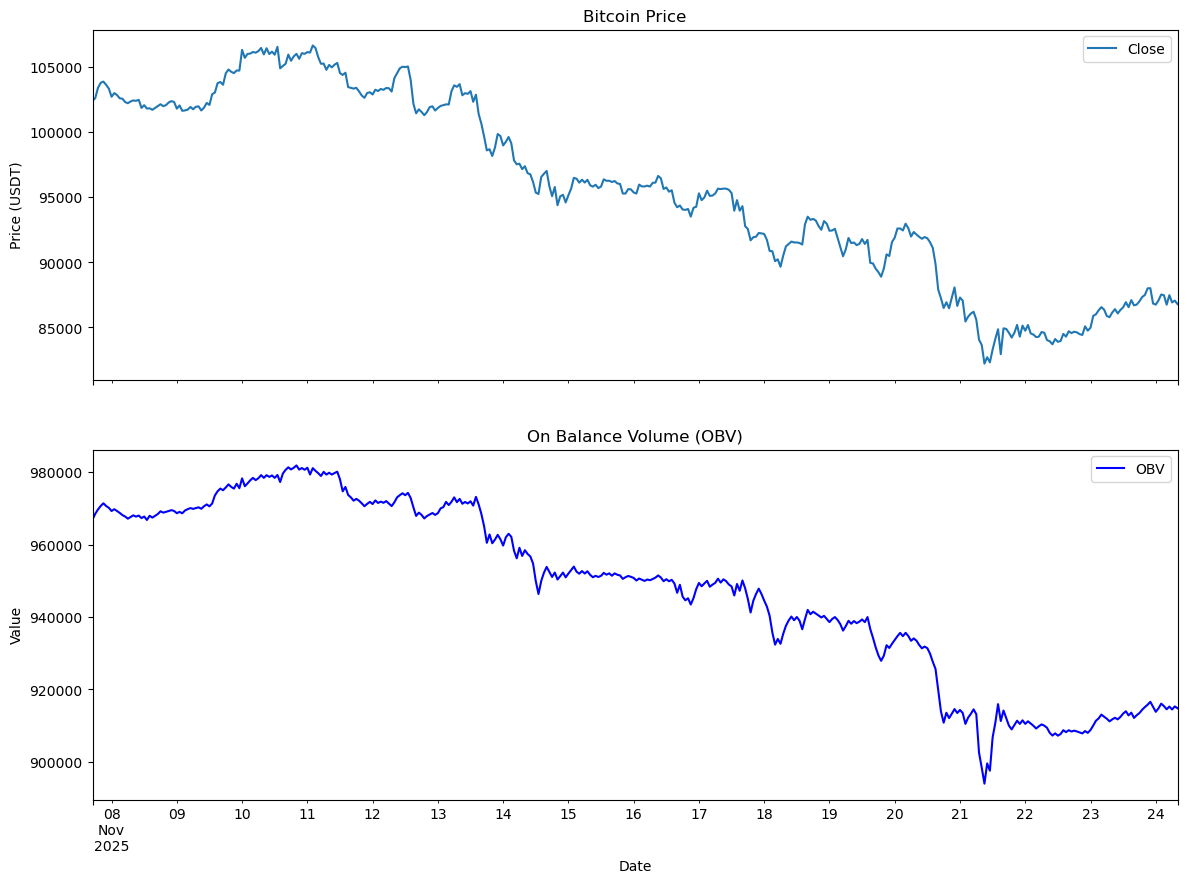

In [33]:
# On Balance Volume Calculation
df['OBV'] = ta.OBV(df['Close'], df['Volume'])
df_sample = df.tail(400)    
# Plotting OBV
fig, ax = plt.subplots(2,1, figsize=(14,10), sharex=True)
df_sample[['Close']].plot(ax=ax[0])
ax[0].set_title('Bitcoin Price')
ax[0].set_ylabel('Price (USDT)')
df_sample[['OBV']].plot(ax=ax[1], color='blue')
ax[1].set_title('On Balance Volume (OBV)')
ax[1].set_ylabel('Value')
plt.xlabel('Date')
plt.show()  

### 4.2 Relative Volume
Relative volume is used to evaluate the participation in an asset. An increase in the relative volume indicates an increase of the interest in the asset.

It is calculated comparing the current volume with the average volume of a given period (usually 20 periods).

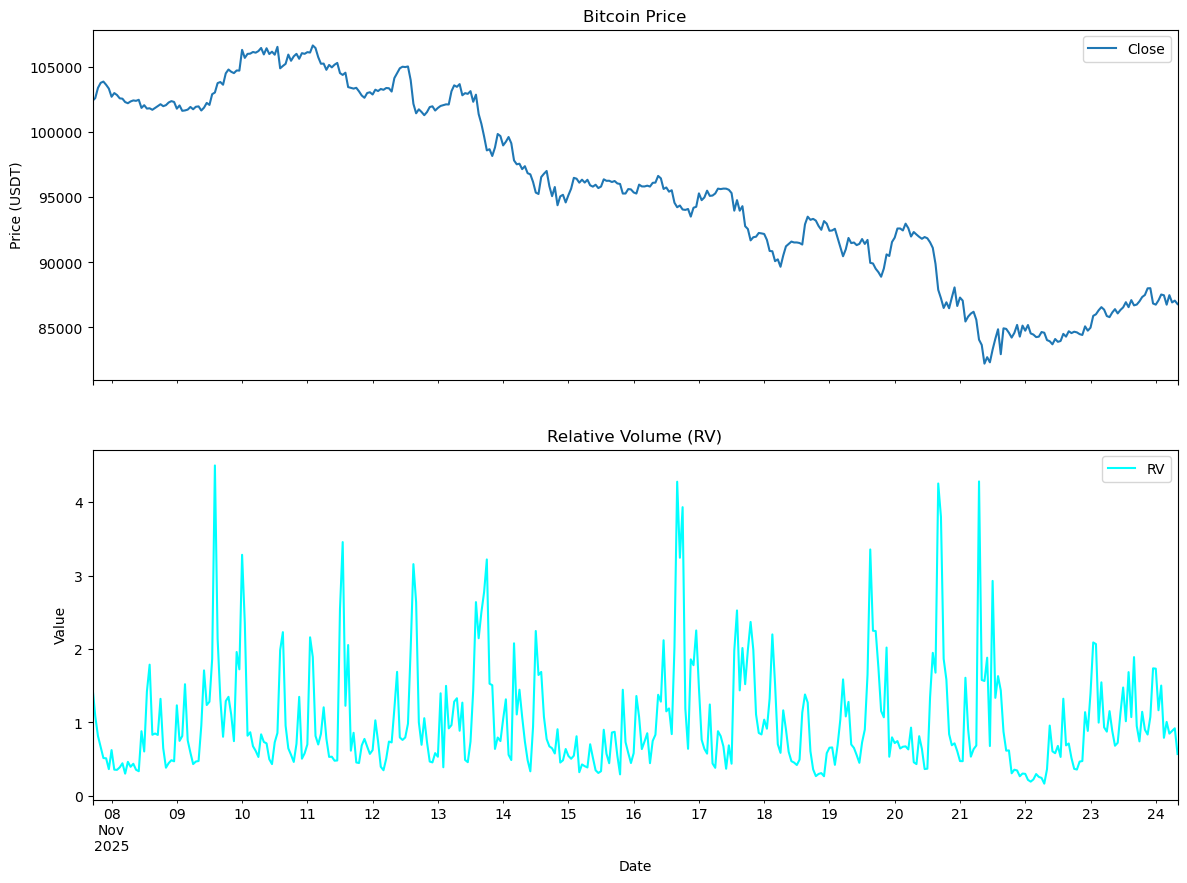

In [34]:
# Relative Volume Calculation
df['RV'] = df['Volume'] / df['Volume'].rolling(window=20).mean()
df_sample = df.tail(400)    
# Plotting Relative Volume
fig, ax = plt.subplots(2,1, figsize=(14,10), sharex=True)
df_sample[['Close']].plot(ax=ax[0])
ax[0].set_title('Bitcoin Price')
ax[0].set_ylabel('Price (USDT)')
df_sample[['RV']].plot(ax=ax[1], color='cyan')
ax[1].set_title('Relative Volume (RV)')
ax[1].set_ylabel('Value')
plt.xlabel('Date')
plt.show()  

### 4.3 Acummulation and Distribution
Acummulation and Distribution (A/D line) is used to identify if an asset is being purchased or sold. If the A/D increases in a bullish trend, it confirms the bullish power.

 It is calculated comparing close prices of previous close periods with volume.

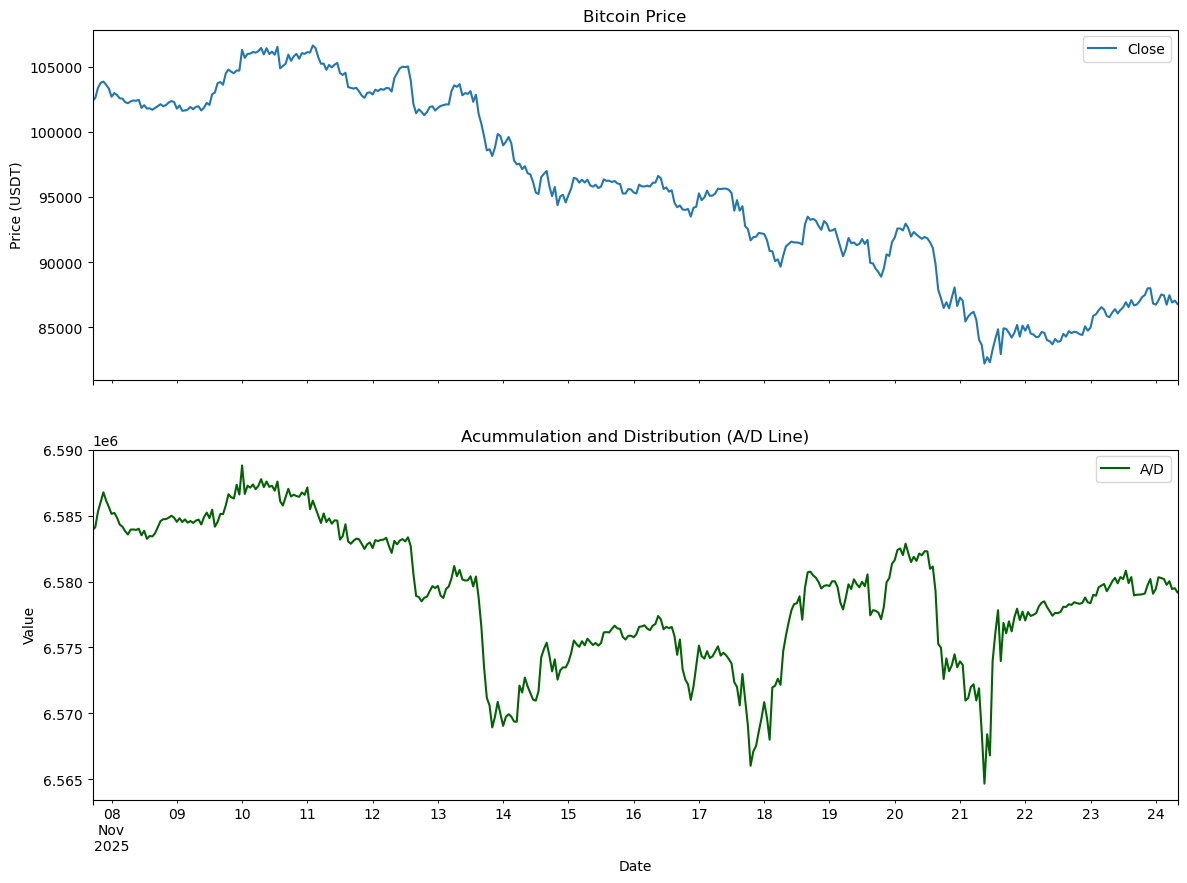

In [35]:
# Acummulation and Distribution Calculation
df['A/D'] = ta.AD(df['High'], df['Low'], df['Close'], df['Volume'])
df_sample = df.tail(400)    
# Plotting A/D Line
fig, ax = plt.subplots(2,1, figsize=(14,10), sharex=True)
df_sample[['Close']].plot(ax=ax[0])
ax[0].set_title('Bitcoin Price')
ax[0].set_ylabel('Price (USDT)')
df_sample[['A/D']].plot(ax=ax[1], color='darkgreen')
ax[1].set_title('Acummulation and Distribution (A/D Line)')
ax[1].set_ylabel('Value')
plt.xlabel('Date')
plt.show()  

## Final Step
Finally, we are downloading the updates dataset to a csv file.

In [36]:
# Loading the updated dataset with technical indicators to a CSV file
df.to_csv('../data/btcusdt_1h_2018_indicators.csv')

# 📕 Final Notes
I have calculated all the indicators in **Isaac Trullás** book. This initial selection of indicators serves as a sufficient starting point for the analysis. Feature selection techniques will be applied to determine the optimal subset, and further indicators may be engineered if empirical results suggest they are required."

#### **Author:** Martín Campillo